# Cours M2 Principes de modélisation: convergence d'un modèle micro vers l'équation de la chaleur

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import scipy.optimize
import math 
from math import sin, pi, log, exp, sqrt
import os
%matplotlib notebook
from matplotlib.animation import FuncAnimation

Le but est d'observer la convergence de la loi de proba vers sa limite continue.

Soit $X \in \mathbb{N}^*$. On note $\displaystyle \Delta x := \frac{1}{X}$ et pour tout $i \in \mathbb{Z}$, on notera $x_i = i \Delta x$ de telle sorte que $x_{-X} = -1 < x_{-X+1} < \cdots < x_X = 1$. 

In [2]:
X = 50 # Taille du domaine qu'on regarde (doit etre un entier)
position = np.zeros(X+1)
for ii in range(0,X+1):
        position[ii] = ii
print("les deux valeurs extremales de position sont ",position[0]," et ",position[X])

les deux valeurs extremales de position sont  0.0  et  50.0


# 1- Modèle discret

In [3]:
# On definit la condition initiale
P0 = np.zeros(X+1)
P0[0] = 1

# On definit le nb de pas de temps
M = X-5

# On verifie que le nombre de pas de temps ne soit pas trop grand, pour eviter de toucher les bords
if (M >= X-3):
    M = X-4
    print("ATTENTION: on a diminué le nb de pas de temps")

print("Le nb de pas de temps est ",M)

# On affiche la CI
print(P0)

print("les deux valeurs extremales de P0 sont ",P0[0]," et ",P0[X])

Le nb de pas de temps est  45
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]
les deux valeurs extremales de P0 sont  1.0  et  0.0


In [4]:
# On realise l'iteration en temps 
     
# On va stocker dans Ptab la solution aux differents pas de temps
Ptab = np.zeros((X+1,M))
P = P0

for nn in range(0,M):
    Pnew = np.zeros(X+1)
    Ptab[:,nn] = P
    Pnew[0] = (P[1] + P[1])/2 # On se sert de la symetrie pour dire que P(-1) = P(1)
    for ii in range(1,X):
        Pnew[ii] = (P[ii-1] + P[ii+1])/2
    # on ne remet jamais à jour Pnew(X), qui reste egal à 0
    # c'est correct car le nb de pas de temps est trop petit pour que le signal atteigne cet endroit
    P = Pnew

In [5]:
print(Ptab[:,5])

[0.      0.3125  0.      0.15625 0.      0.03125 0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.      0.      0.      0.
 0.      0.      0.      0.      0.      0.     ]


<IPython.core.display.Javascript object>


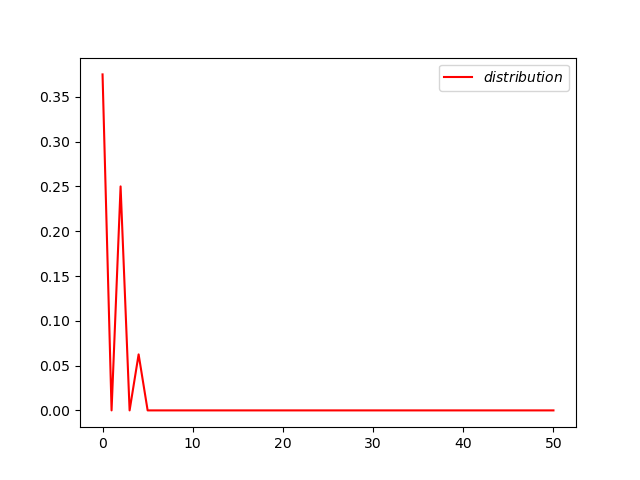

In [6]:
# On visualise à un instant
plt.plot(position,Ptab[:,4], 'r', label ="$distribution$")
plt.legend()
plt.show()

In [7]:
plt.close()

In [8]:
# on complete par les indices de position negatifs pour que ce soit plus comprehensible
pos_Full = np.zeros(2*X+1)
P_Full = np.zeros((2*X+1,M))
                  
for ii in range(0,X+1):
    pos_Full[X+ii] = position[ii]
    pos_Full[ii] = -position[X-ii]
    for nn in range(0,M):
        P_Full[X+ii,nn] = Ptab[ii,nn]
        P_Full[ii,nn] = Ptab[X-ii,nn]

#print(P_Full[:,8]) 

<IPython.core.display.Javascript object>


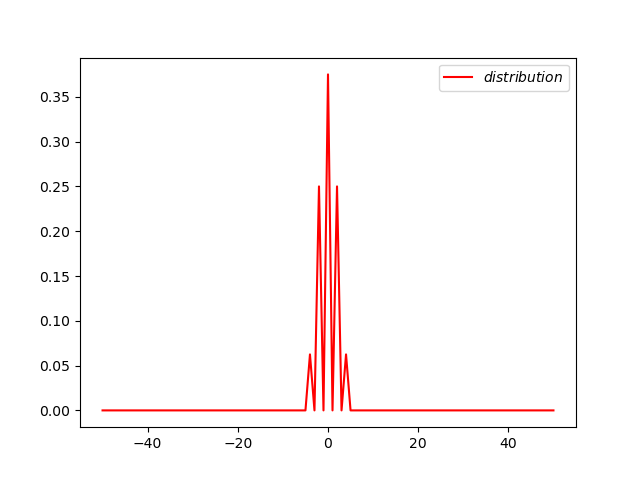

In [9]:
# On visualise à un instant
plt.plot(pos_Full,P_Full[:,4], 'r', label ="$distribution$")
plt.legend()
plt.show()

In [10]:
plt.close()

In [11]:
# on vire les zeros intermediaires pour que ce soit plus comprehensible
P_Full_sans_zero = np.zeros((2*X+1,M))
for nn in range(1,M):
    # si n est pair, alors seuls les indices pairs sont remplis
    if (nn % 2 == 0):
        for ii in range(0,2*X):
            if (ii % 2 == 0):
                P_Full_sans_zero[ii,nn] = P_Full[ii,nn]
            else:
                P_Full_sans_zero[ii,nn] = (P_Full[ii-1,nn] + P_Full[ii+1,nn])/2
    else:
        for ii in range(0,2*X):
            if (ii % 2 == 0):
                P_Full_sans_zero[ii,nn] = (P_Full[ii-1,nn] + P_Full[ii+1,nn])/2
            else:
                P_Full_sans_zero[ii,nn] = P_Full[ii,nn]

<IPython.core.display.Javascript object>


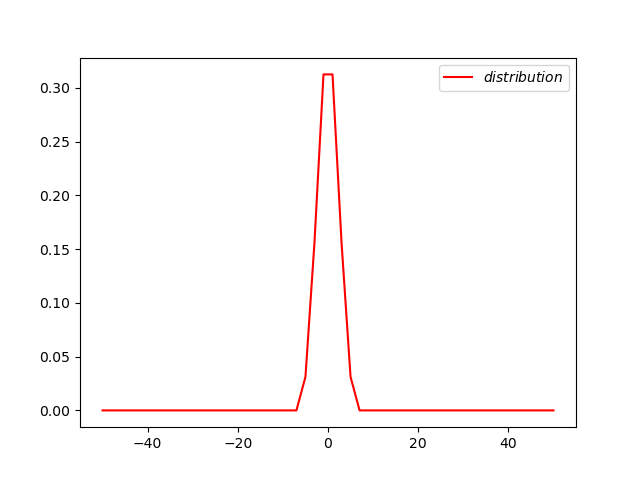

In [12]:
# On visualise à un instant
plt.plot(pos_Full,P_Full_sans_zero[:,5], 'r', label ="$distribution$")
plt.legend()
plt.show()

In [13]:
plt.close()

<IPython.core.display.Javascript object>


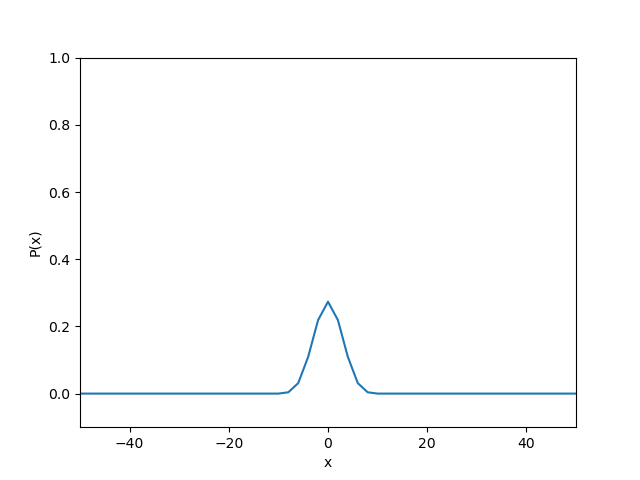

In [14]:
## Le but de cette fonction est d'afficher l'évolution de P au cours du temps
fig1, ax1 = plt.subplots(1)
plotP,  = ax1.plot(pos_Full,P_Full_sans_zero[:,0])

def animate(p):
    PP = P_Full_sans_zero[:,p]
    plotP.set_ydata(PP) 
    
def init(): 
    ax1.set_xlim(-X, X)
    ax1.set_ylim( -0.1, 1.)
    ax1.set_xlabel('x')
    ax1.set_ylabel('P(x)')    
    return plotP,

step = 1
steps = np.arange(1,M,step)
ani1 = FuncAnimation(fig1, animate,steps, init_func = init, interval = 200, blit = True)

In [15]:
plt.close()

In [16]:
# On rescale (pour meilleure visualisation) pour que P reste à la valeur 1 en x=0
P_Full_sans_zero_resc = np.zeros((2*X+1,M))
for nn in range(1,M):
    P_Full_sans_zero_resc[:,nn] = P_Full_sans_zero[:,nn]/P_Full_sans_zero[X,nn]
print(P_Full_sans_zero[X,M-1])
print(P_Full_sans_zero_resc[X,M-1])

0.11960417871932805
1.0


<IPython.core.display.Javascript object>


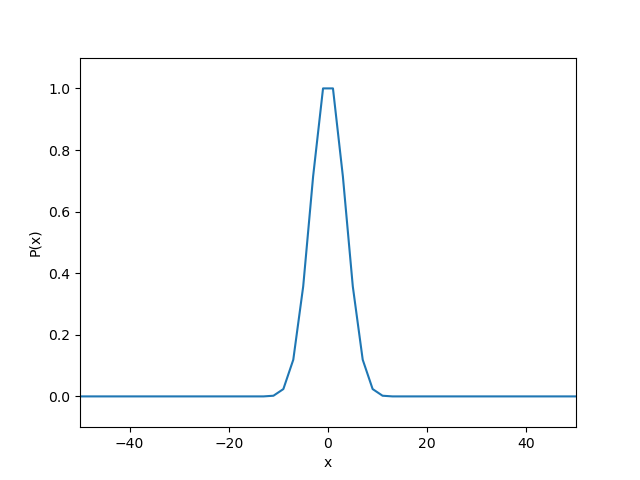

In [17]:
## Le but de cette fonction est d'afficher l'évolution de P au cours du temps
fig1, ax1 = plt.subplots(1)
plotP,  = ax1.plot(pos_Full,P_Full_sans_zero_resc[:,0])

def animate(p):
    PP = P_Full_sans_zero_resc[:,p]
    plotP.set_ydata(PP) 
    
def init(): 
    ax1.set_xlim(-X, X)
    ax1.set_ylim( -0.1, 1.1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('P(x)')    
    return plotP,

step = 1
steps = np.arange(1,M,step)
ani1 = FuncAnimation(fig1, animate,steps, init_func = init, interval = 200, blit = True)

In [18]:
plt.close()